<a href="https://colab.research.google.com/github/agamthind96/Data-Analysis/blob/main/Introduction_to_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Anscombe dataset

In [48]:
import seaborn as sns

In [2]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## Matpotlib

- Matplotlib is a Python's fundamental plotting library. It is extremely flixible and gives the user full control over all elements of the plot.

In [49]:
import matplotlib.pyplot as plt

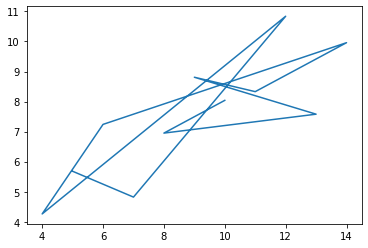

In [4]:
dataset_1 = anscombe[anscombe['dataset'] =='I']

plt.plot(dataset_1['x'], dataset_1['y']);

- By default, plt.plot will draw lines. If we want to draw plot with points, we can pass an 'o' parameter to tell plt.plot to use points.

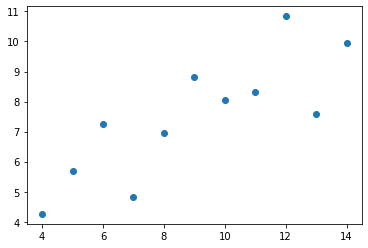

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o');

### Create subset of remaining Anscombe dataset

In [6]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

- Matplot offers a much handier way to craete subplots in a single figure.
- Matplot **subplot** syntax takes three parameters.
  - 1. Number of rows in the figure for subplots.
  - 2. Number of columns in the figure for subplots.
  - 3. Subplot location.



#### Create the entire figure where our subplots will go

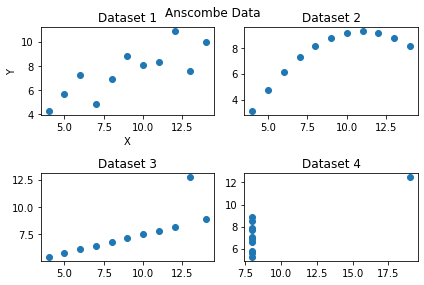

In [7]:
#### Create the entire figure where our subplots will go
fig = plt.figure()

#### Figure will have 2 rows and 2 columns.
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


#### Add a plot to each of the axes created above.
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o');

#### Add a small title to each subplot.
axes1.set_title("Dataset 1")
axes2.set_title("Dataset 2")
axes3.set_title("Dataset 3")
axes4.set_title("Dataset 4");

#### Set X and Y labels
axes1.set_xlabel('X')
axes1.set_ylabel('Y')

#### Add a title for entire figure
fig.suptitle("Anscombe Data")

#### Use a tight layout
fig.tight_layout();

## Statistical Graphics using Matplotlib

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.shape

(244, 7)

### Univariate

- In statistics jargon, the term "univariate" refers to a single variable.

#### Histograms

- Histograms are the most common means of looking at single variable.

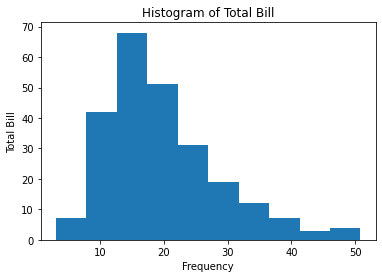

In [10]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.hist(tips['total_bill'], bins=10);
axes.set_title('Histogram of Total Bill')
axes.set_xlabel('Frequency')
axes.set_ylabel('Total Bill')
fig.show();


### Bivariate

- In statistics jardon, bivariate refers to two variables.

#### Scatterplot

- Scatterplots are used when a continuous variable is plotted against another continuous variable.

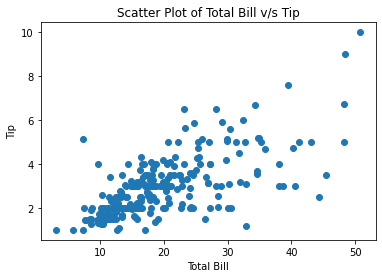

In [11]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(111)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatter Plot of Total Bill v/s Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show();


#### Boxplot 

- Boxplot are used when a discrete variable is plotted against a continuous variable.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


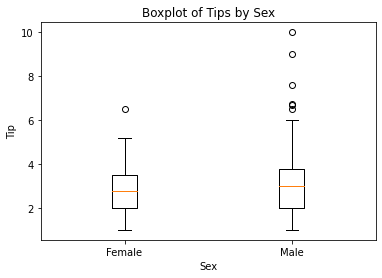

In [12]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(111)
axes1.boxplot(
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']],
     labels=['Female','Male']
)

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
boxplot.show();

### Multivariate Data

- Create a color variable based on sex

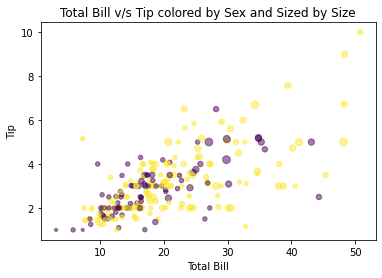

In [13]:
def recode_sex(sex):
  if sex == 'Female' :
    return 3
  else:
    return 4

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(111)
axes1.scatter(x=tips['total_bill'],
              y=tips['tip'],
              c=tips['sex_color'],
              s=tips['size']*10,
              alpha=0.5)

axes1.set_title('Total Bill v/s Tip colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show();

## Seaborn

### Univariate

#### Histograms

- Histograms are created using sns.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


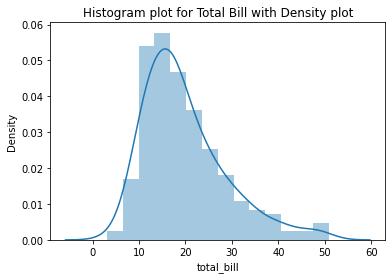

In [14]:
hist, ax = plt.subplots() # this subplot function is a shortcut for creating seperate figure objects and adding indivdual subplots (axes) to the figure

# Use the distplot function from seaborn
ax = sns.distplot(tips['total_bill'])
ax.set_title("Histogram plot for Total Bill with Density plot")

plt.show();

- If we just want histogram, set kde=False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


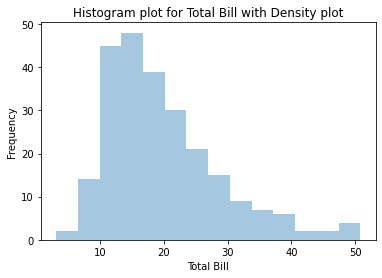

In [15]:
hist, ax = plt.subplots() # this subplot function is a shortcut for creating seperate figure objects and adding indivdual subplots (axes) to the figure

# Use the distplot function from seaborn
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title("Histogram plot for Total Bill with Density plot")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Frequency")

plt.show();

#### Density Plot(Kernel Density Estimation)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


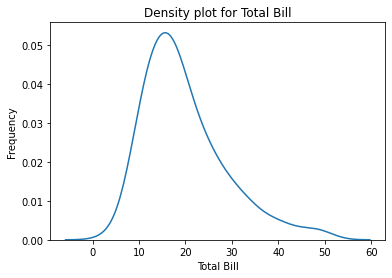

In [16]:
den, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], hist=False)
ax.set_title("Density plot for Total Bill")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Frequency")

plt.show();

#### Rug Plot

- Rug plots are 1-D representation of a variable's distribution. They are typically used with other plots to enhance a visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


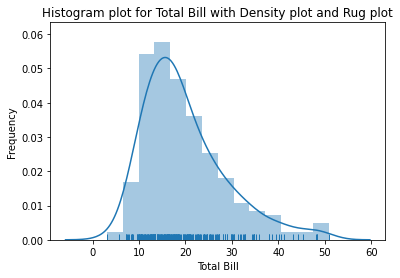

In [17]:
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], rug=True)
ax.set_title("Histogram plot for Total Bill with Density plot and Rug plot")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Frequency")

plt.show();

#### Count Plot (Bar Plot)

- Bar plots are used to count discrete variables.

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,3
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,3


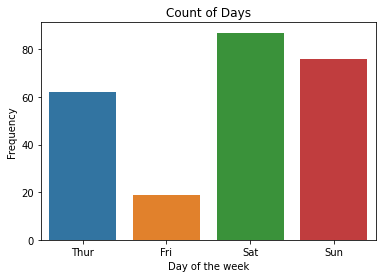

In [19]:
count, ax = plt.subplots()
ax = sns.countplot(x = 'day', data=tips)
ax.set_title('Count of Days')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')

plt.show();

### Bivariate data

#### Scatter plot

- There is no explicit function in seaborn to create scatter plot with name *scatter*.
- We can use *regplot* and use the term **fit_reg = False** to plot a scatter plot.

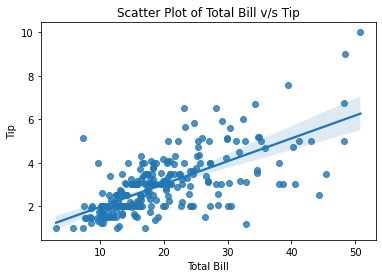

In [20]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title("Scatter Plot of Total Bill v/s Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

plt.show();


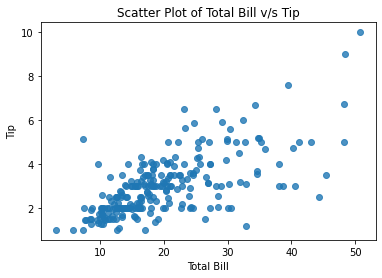

In [21]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title("Scatter Plot of Total Bill v/s Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

plt.show();


#### lmplot

- Scatter plot can also be created using **lmplot**.
- The maine difference is that *regplot* creates axes whereas *lmplot* creates a figure.

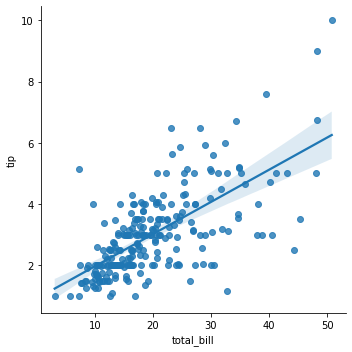

In [22]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show();

#### Jointplot

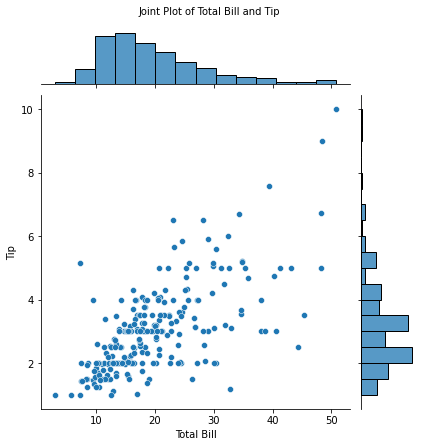

In [23]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03);

#### Hexbin Plot

- Sometimes scatter plto may require too many points to make the plot meaningful.
- A *hexbin* can bin 2 variables and hexagon is used for this purpose because it is the most efficient shape to cover an arbitrary 2D surface.


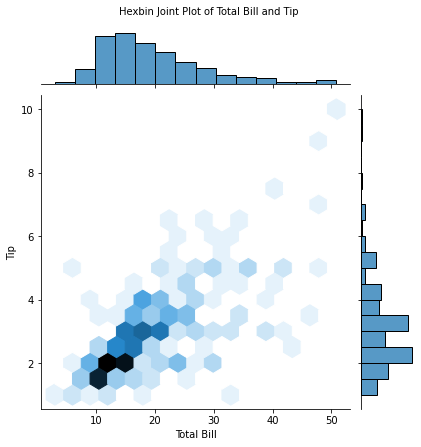

In [24]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel="Total Bill", ylabel="Tip")
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03);

#### 2-D Density plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


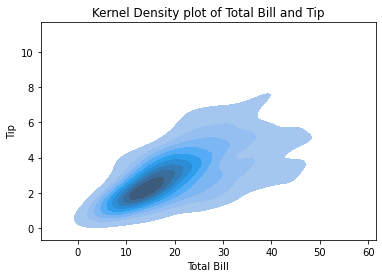

In [27]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True) # shade will fill in the contours
ax.set_title('Kernel Density plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show();

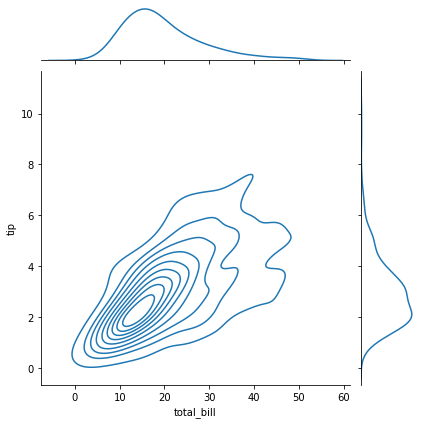

In [28]:
kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde');

#### Bar Plot

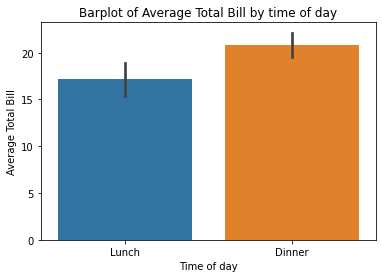

In [30]:
bar, ax =plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Barplot of Average Total Bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average Total Bill')
plt.show();

#### Box Plot




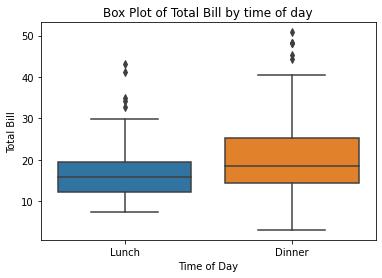

In [31]:
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Box Plot of Total Bill by time of day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')
plt.show();


#### Violin Plot

- They can retain more information than boxplot as they plot boxes as a kernel density estimation.

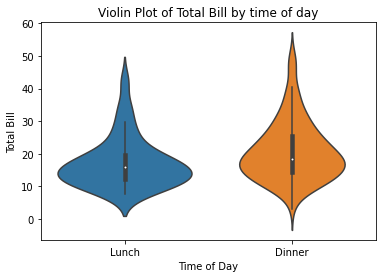

In [32]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin Plot of Total Bill by time of day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')
plt.show();

#### Pairwise Relationships

- This function will plot a scatterplot between each pair of variables, and a histogram for the univariate data.

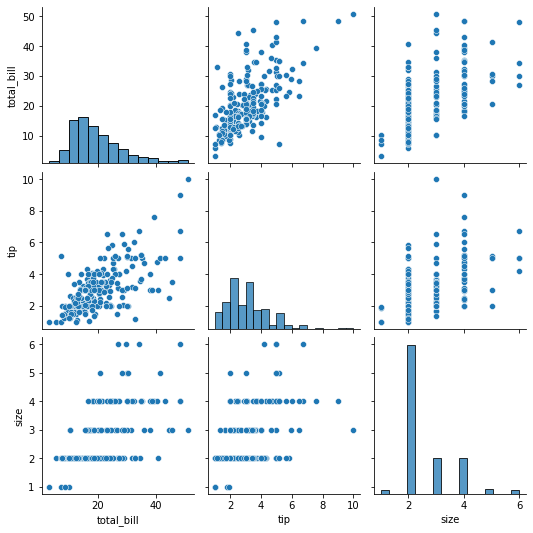

In [34]:
fig  = sns.pairplot(tips)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

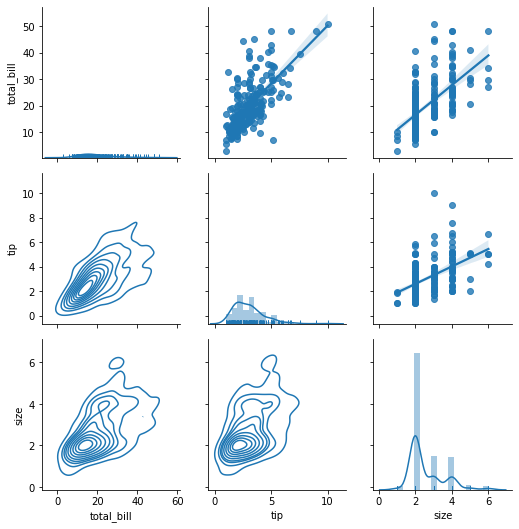

In [36]:
pair_grid = sns.PairGrid(tips)

pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show();

### Multi-Variate Plots

#### Colors

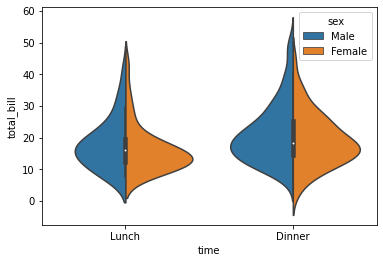

In [37]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',
                    hue='sex', data=tips,
                    split=True)

plt.show();

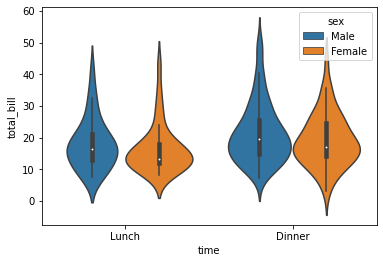

In [38]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',
                    hue='sex', data=tips,
                    split=False)

plt.show();

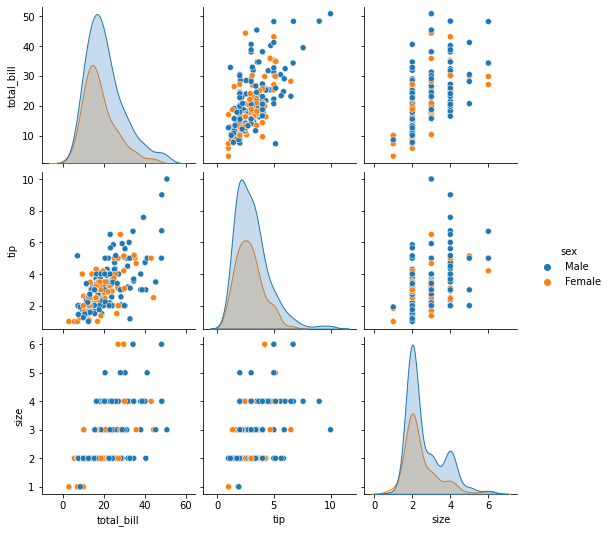

In [39]:
fig = sns.pairplot(tips, hue='sex')

#### Size and Shape

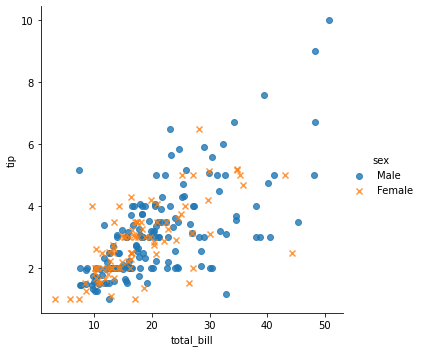

In [46]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
                     fit_reg=False,
                     hue='sex',
                     markers=['o','x'])

plt.show();

#### Facets



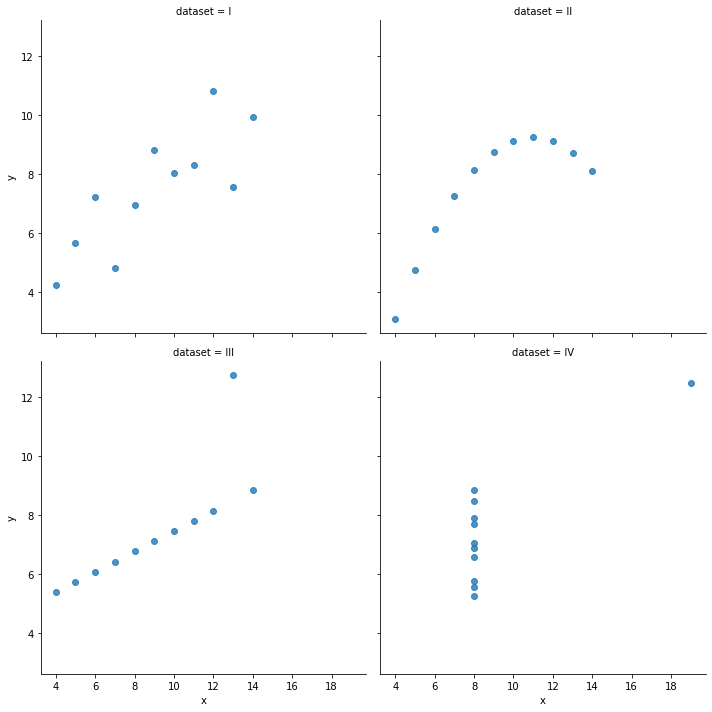

In [47]:
ansombe_plot = sns.lmplot(x='x', y='y', data=anscombe,
                          fit_reg=False,
                          col='dataset', col_wrap=2
                          )

- The **col** parameter is the variable that the plot will facet by, and the **col_wrap** parameter creates a figure that has two columns. If we do not use the **col_wrap** parameter, all four plots will be oplotted in the same row.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

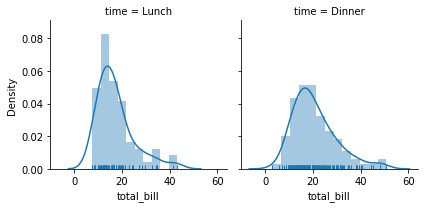

In [50]:
facet = sns.FacetGrid(tips, col='time') #Create the FacetGrid
facet.map(sns.distplot, 'total_bill', rug=True) 
plt.show();

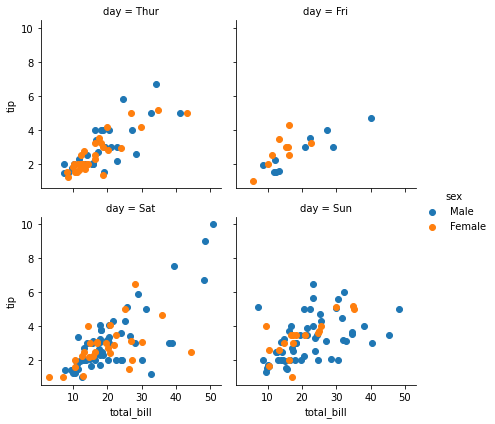

In [52]:
facet = sns.FacetGrid(tips, col='day', hue='sex', col_wrap=2) 
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()
plt.show();

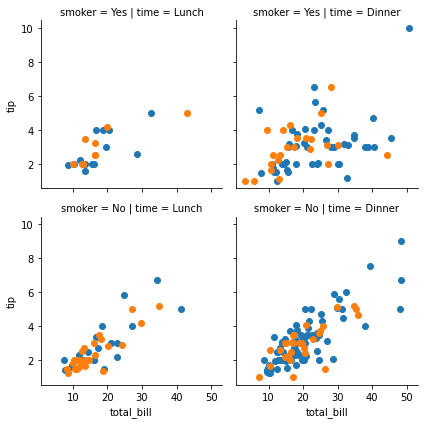

In [53]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


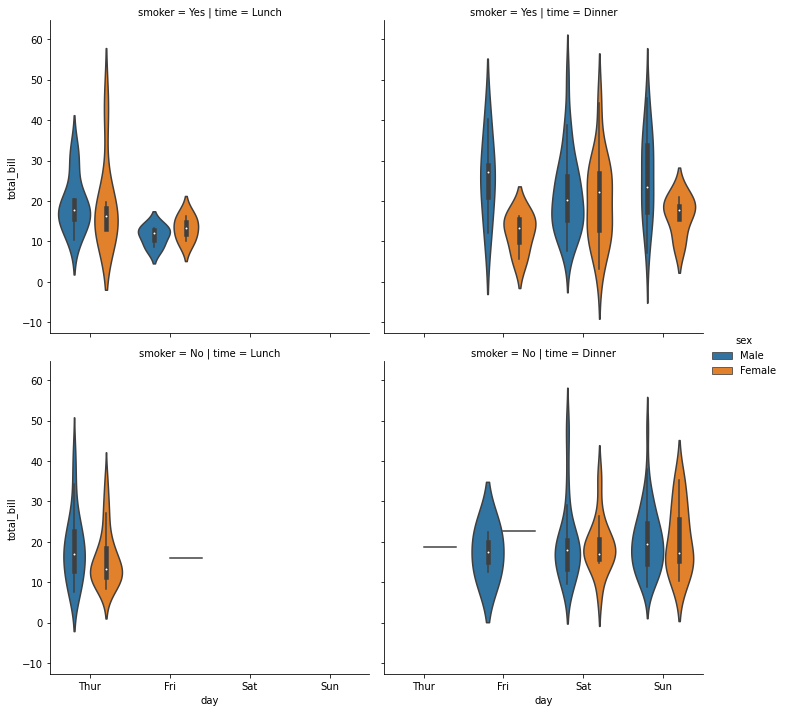

In [54]:
facet = sns.factorplot(x='day', y='total_bill', hue='sex', data=tips, row='smoker', col='time', kind='violin')

## Pandas Objects

- DataFrame.plot.PLOT_TYPE
- Series.plot.PLOT_TYPE

### Histograms

- On a Series

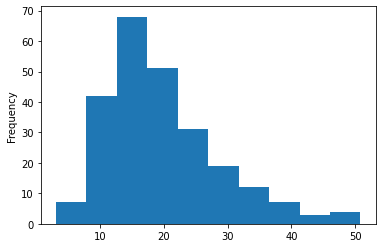

In [56]:
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()
plt.show();

- On a DataFrame

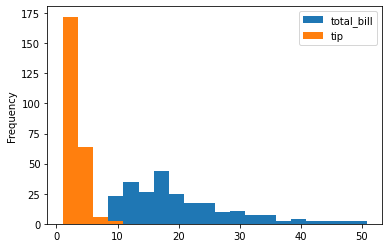

In [61]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=1,bins=20, ax=ax)
plt.show();

### Density Plot

- The kernel density estimation (density) plot can be created with the **DataFrame.plot.kde** function.


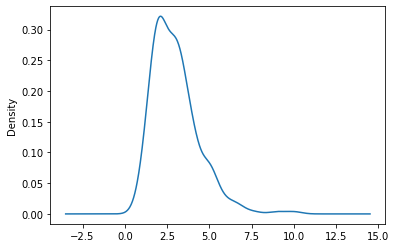

In [62]:
fig,ax = plt.subplots()
ax = tips['tip'].plot.kde()
plt.show();

### Scatter Plot

- Scatter plots are created using **DataFrame.plot.scatter** function.

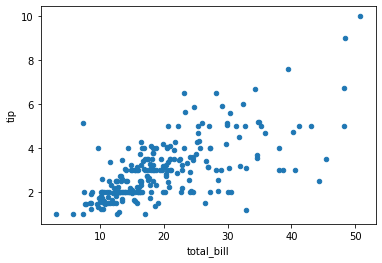

In [63]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)
plt.show();

### Hexbin Plot

- Hexbin plots are created using the **DataFrame.plt.hexbin** function.

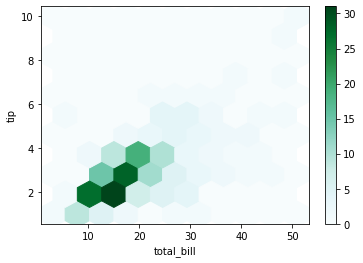

In [65]:
fig, ax= plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax, gridsize=10)
plt.show();


### Box Plot

- Box Plots are created using **DataFrame.plot.box** function.

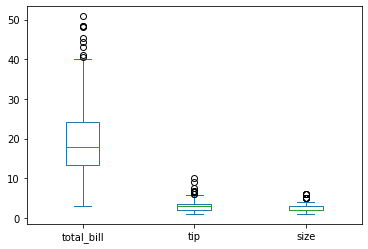

In [66]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)
plt.show();

## Seaborn Themes and Styles

- The styles that comes with seaborn are *darkgrid, whitegrid, dark, white and ticks*.

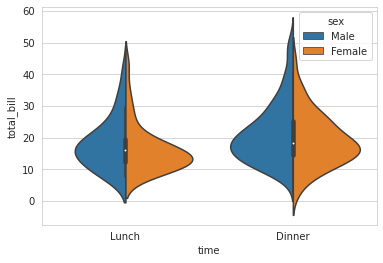

In [67]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show();

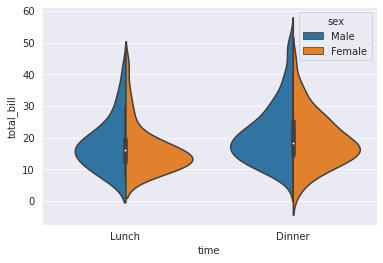

In [68]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show();